<a href="https://colab.research.google.com/github/swapnilbetkar/python/blob/Dev_Self/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Function to map columns to binary values
def binaryMapping(value):
  if value == 'Excellent':
    return 1
  else:
    return 0

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Beverage.csv")
pd.set_option('display.max_columns',None)

dataset['quality'] = dataset['quality'].apply(binaryMapping)

min_threshold, max_threshold = dataset['total sulfur dioxide'].quantile([0.001,0.90])
dataset = dataset[(dataset['total sulfur dioxide'] < max_threshold) & (dataset['total sulfur dioxide'] > min_threshold)]

min_threshold, max_threshold = dataset['free sulfur dioxide'].quantile([0.01,0.90])
dataset = dataset[(dataset['free sulfur dioxide'] < max_threshold) & (dataset['free sulfur dioxide'] > min_threshold)]

min_threshold, max_threshold = dataset.chlorides.quantile([0.001,0.90])
dataset = dataset[(dataset.chlorides < max_threshold) & (dataset.chlorides > min_threshold)]

min_threshold, max_threshold = dataset['residual sugar'].quantile([0.001,0.90])
dataset = dataset[(dataset['residual sugar'] < max_threshold) & (dataset['residual sugar'] > min_threshold)]

min_threshold, max_threshold = dataset['fixed acidity'].quantile([0.001,0.99])
dataset = dataset[(dataset['fixed acidity'] < max_threshold) & (dataset['fixed acidity'] > min_threshold)]

# min_threshold, max_threshold = dataset.chlorides.quantile([0.001,0.99])
# dataset = dataset[(dataset.chlorides < max_threshold) & (dataset.chlorides > min_threshold)]

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000
mean,6.805862,0.274790,0.322315,4.508456,0.039289,29.970608,122.617406,0.992794,3.203356,0.486302,10.942927,0.273235
std,0.830210,0.099069,0.107105,3.389299,0.008521,11.422856,31.842878,0.002258,0.150764,0.116817,1.168260,0.445694
min,4.600000,0.080000,0.000000,0.800000,0.015000,7.000000,30.000000,0.987110,2.790000,0.220000,8.400000,0.000000
25%,6.200000,0.200000,0.270000,1.600000,0.033000,21.000000,100.000000,0.991100,3.100000,0.400000,10.000000,0.000000
50%,6.800000,0.260000,0.310000,3.200000,0.039000,30.000000,121.000000,0.992610,3.200000,0.470000,10.900000,0.000000
75%,7.300000,0.320000,0.370000,7.000000,0.046000,38.000000,146.000000,0.994400,3.300000,0.550000,11.850000,1.000000
max,9.200000,1.100000,1.660000,13.000000,0.056000,53.000000,194.000000,1.000400,3.820000,1.080000,14.200000,1.000000


In [ ]:
Y = dataset['quality'] #Labels
X = dataset.drop('quality',axis=1) #features
featureScalar = StandardScaler()
X_scaled = featureScalar.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.35, random_state = 1)

In [ ]:
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(Y_train).value_counts()

1    1446
0    1446
dtype: int64

In [ ]:
# rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
# grid_param = {
#      'n_estimators' : [100, 150,200,300],
#      'max_features': [3, 5, 10]
# }

# gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='precision', cv=5)
# gd_sr.fit(X_train, Y_train)

# best_parameters = gd_sr.best_params_
# print(best_parameters)

# best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
# print(best_result)

In [ ]:
# Y_pred = dtree.predict(X_test)
# print("Prediction Accuracy: ", metrics.accuracy_score(Y_test, Y_pred)) # Not a good idea coz imbalanced test set
# conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_mat,annot=True)
# plt.title("Confusion_matrix")
# plt.xlabel("Predicted Class")
# plt.ylabel("Actual class")
# plt.show()
# print('Confusion matrix: \n', conf_mat)
# print('TP: ', conf_mat[1,1])
# print('TN: ', conf_mat[0,0])
# print('FP: ', conf_mat[0,1])
# print('FN: ', conf_mat[1,0])

alcohol                 0.153064
density                 0.108046
chlorides               0.099520
free sulfur dioxide     0.090797
residual sugar          0.087441
total sulfur dioxide    0.084892
pH                      0.078572
citric acid             0.078542
volatile acidity        0.076400
sulphates               0.074635
fixed acidity           0.068092
dtype: float64


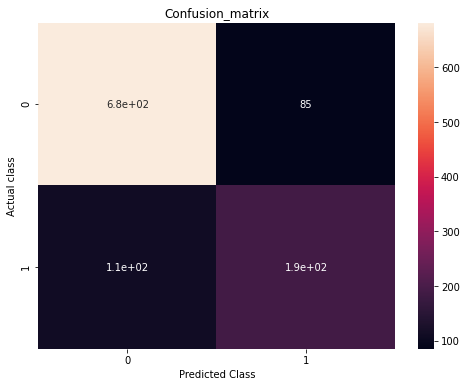

Confusion matrix: 
 [[682  85]
 [111 188]]
TP:  188
TN:  682
FP:  85
FN:  111


In [ ]:
rfc = RandomForestClassifier(n_estimators=150, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])